# LA Mayor Candidate: Crime Analysis
Project Description/Outline:
Congratulations! Your boss has decided to run for a mayor position in LA County. The first action item the mayor is planning on doing is to investigate and analyze which neighborhood(s) has the most crime and help alleviate neighborhoods in need. 

Team Members:
Nico Barzotti
Clair Dean
Menard Cayabyab 

In [64]:
%matplotlib notebook

In [65]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

In [66]:
#Import files
crime_data_to_load= "../Resources/crime-data-from-2010-to-present.csv"

crime_data_df=pd.read_csv(crime_data_to_load)

crime_data_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


# Summary Statistics 
Out of all the area names in LA County, the most common geographical area name with the most crime documented was on 77th Street. On 77th Street there was also a count of 422 homicides (Crime Code 110) documented, being the highest number of homicides in the area. 

Looking at the lowest crime occurring in LA County is Hollenbeck, with a count of 73514 occurring. Furthermore, 77th Street’s types of crimes that most commonly occurred was Simple Assault (Crime Code 624) with a count of 14497 and Reckless Driving (Crime Code 510) with 12255. With Hollenbeck, the lowest crime count area name, the top two crimes occurring was Reckless Driving (Crime Code 510) and Malicious Mischief (Crime Code 624).

In [67]:
#Total number of unique area names
area_name_count=len(crime_data_df["Area Name"].unique())
area_name_count

21

In [68]:
#Total number of Crime Code Description
crime_count=len(crime_data_df["Crime Code Description"].unique())
crime_count

140

In [69]:
#Find the most common geographical area name in LA County
most_common_area=crime_data_df["Area Name"].value_counts()
most_common_area.head(15)

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Olympic         89634
Harbor          86972
Name: Area Name, dtype: int64

In [70]:
#What area name has the least committed amount of crimes?
least_common_area=crime_data_df["Area Name"].value_counts(ascending=True)
least_common_area.head(15)

Hollenbeck     73514
Foothill       75348
Wilshire       82575
West LA        83736
Rampart        84241
West Valley    84521
Harbor         86972
Olympic        89634
Central        90489
Devonshire     91347
Topanga        92262
Hollywood      92742
Newton         94123
Van Nuys       94358
Northeast      94912
Name: Area Name, dtype: int64

In [71]:
#Most common types of crimes and least type of crimes in LA County 
crime_code_count=crime_data_df['Crime Code'].value_counts(ascending=False)
crime_code_count

624    180434
330    153451
510    151622
440    141489
310    140926
        ...  
432         3
926         2
906         2
453         1
905         1
Name: Crime Code, Length: 140, dtype: int64

In [72]:
#Find the highest amount of homicides by Area Name
homicide_count=crime_data_df[crime_data_df['Crime Code']==110].groupby(['Area Name'])['DR Number'].count()
sorted_homicide=homicide_count.sort_values(ascending=False)
sorted_homicide

Area Name
77th Street    422
Southeast      363
Newton         229
Southwest      212
Hollenbeck     157
Harbor         156
Rampart        139
Mission        128
Foothill       111
Central         98
Northeast       86
Olympic         79
N Hollywood     76
Hollywood       66
Van Nuys        58
Wilshire        55
West Valley     52
Pacific         48
Devonshire      39
Topanga         36
West LA         24
Name: DR Number, dtype: int64

In [73]:
#Find the Crime Code occurring most in the highest crime area name
crime_max=crime_data_df.groupby(['Area Name'])[['Crime Code']].value_counts()
crime_max.head(15)

Area Name    Crime Code
77th Street  624           14497
             510           12255
             230           11127
             210            9725
             310            9254
             626            9242
             330            7199
             745            6613
             440            6478
             740            6294
             354            6094
             930            4659
             420            4580
             341            2522
             350            1705
dtype: int64

In [74]:
#Find the Crime Code occurring most in the lowest crime area name
lowest_crime_area=crime_data_df.loc[crime_data_df['Area Name'].str.contains('Hollenbeck')]
lowest_crime_area[["Area Name", "Crime Code"]].value_counts()

Area Name   Crime Code
Hollenbeck  510           9234
            624           7637
            440           4688
            330           4410
            740           4363
                          ... 
            822              1
            830              1
            924              1
            880              1
            472              1
Length: 123, dtype: int64

In [75]:
crimepa=crime_data_df['Crime Code Description'].value_counts()
crimearea =crime_data_df.groupby(['Area Name','Crime Code Description'])['Crime Code Description'].count().reset_index(name='Count')
crimearea

,Area Name,Crime Code Description,Count
0,77th Street,ARSON,332
1,77th Street,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,135
2,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",11127
3,77th Street,ATTEMPTED ROBBERY,1246
4,77th Street,BATTERY - SIMPLE ASSAULT,14497
...,...,...,...
2573,Wilshire,VEHICLE - STOLEN,4612
2574,Wilshire,VIOLATION OF COURT ORDER,615
2575,Wilshire,VIOLATION OF RESTRAINING ORDER,582
2576,Wilshire,VIOLATION OF TEMPORARY RESTRAINING ORDER,47


# Determining the Total Number of Crimes that Occurred per Area
In total the top 5 crimes committed in Los Angeles consists of 38.5% of the total crimes. The top 5 crimes in Los Angeles between the year 2010 – 2018 consists of:
“Battery – Simple Assault” at 180,434 counts making up 9.05% compared to the total number of crimes committed.
“Burglary From Vehicle” at 153,451 counts (7.69% compared to the total number of crimes committed.).
Vehicle – Stolen at 151,622 counts (7.60% compared to the total number of crimes committed.)
Theft Plain – Petty at 141,489 counts (7.09% compared to the total number of crimes committed.)
Burglary at 140,926 counts (7.07% compared to the total number of crimes committed.).

The latter 4 crimes are closely related in terms of percentages coming very close hovering around the 7% range. One question to take away from these results is that the crime descriptions “Burglary From Vehicle” and “Vehicle – Stolen” although separate descriptions could be stacked on top of another when reviewing the criminal case. Meaning if the criminal steals the vehicle and at the same time takes the owner’s belongings. By the time the criminal gets arrested he committed both descriptions in one go vs committing the two crimes at separate times. The same concept applies to petty theft and burglary.


In [76]:
# Getting the total number of crimes that occured per area.
total_crimes_per_area = crimearea.groupby(['Area Name'])['Count'].sum().reset_index(name='Total Count')
# Sorting values from highhest count to lowest
total_crimes_per_area.sort_values(by='Total Count', ascending=False, inplace=True)
# Creating a pair to register the total amount of crimes within the dataset
total_crimes = total_crimes_per_area['Total Count'].sum()
# Getting the percentage of crimes that occured per area.
total_crimes_per_area['Percentage'] = total_crimes_per_area['Total Count'] / total_crimes * 100
print(total_crimes_per_area)

      Area Name  Total Count  Percentage
0   77th Street       137513    6.898903
15    Southwest       128111    6.427213
8   N Hollywood       107707    5.403563
12      Pacific       105655    5.300616
14    Southeast       105104    5.272973
7       Mission        98395    4.936388
10    Northeast        94912    4.761649
17     Van Nuys        94358    4.733855
9        Newton        94123    4.722066
6     Hollywood        92742    4.652782
16      Topanga        92262    4.628701
2    Devonshire        91347    4.582796
1       Central        90489    4.539751
11      Olympic        89634    4.496857
4        Harbor        86972    4.363307
19  West Valley        84521    4.240342
13      Rampart        84241    4.226295
18      West LA        83736    4.200959
20     Wilshire        82575    4.142713
3      Foothill        75348    3.780141
5    Hollenbeck        73514    3.688131


<IPython.core.display.Javascript object>


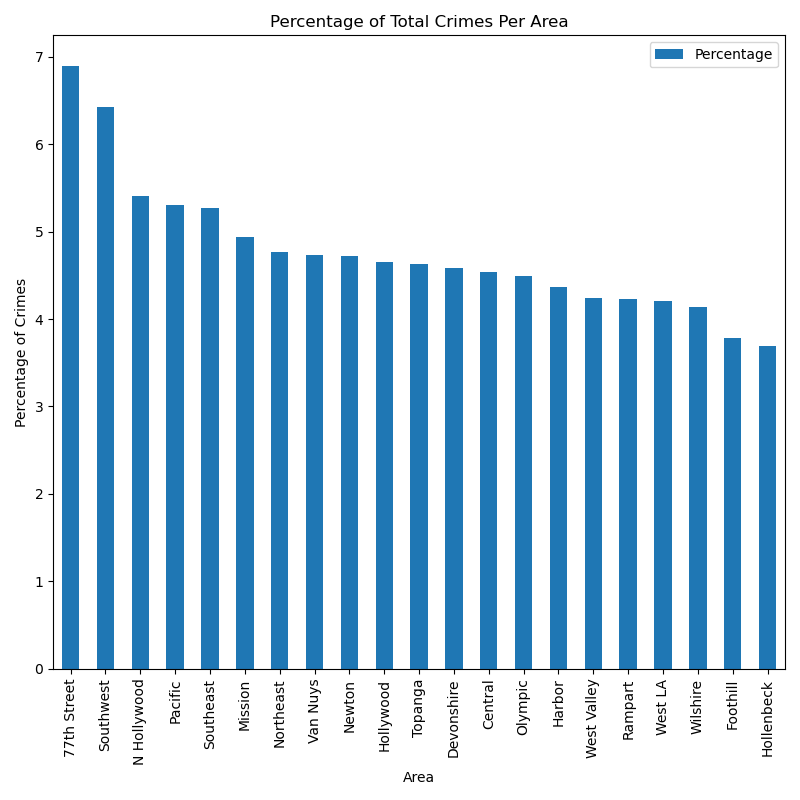

In [77]:
# Plotting the percentage of crimes per area to get a better visual.
total_crimes_per_area.plot(x='Area Name', y='Percentage', kind='bar', figsize=(8, 8))
plt.xlabel('Area')
plt.ylabel('Percentage of Crimes')
plt.title('Percentage of Total Crimes Per Area')
plt.tight_layout()
plt.show()

# Getting the Overall Highest Reported Crime
Using the visual as reference we can see that the count of “Battery – Simple Assault” seems to gradually decline within the 77th Street area and the Southwest area. 77th peaking in 1830 counts to 619 and Southwest going to 1435 counts all the way down to 619. The Central area seems to be going the opposite trend going from 1193 counts and peaking at 1909 counts, making it the highest area that had the most count of simple assault battery. The three have one thing in common and it’s that after the year 2018 it takes a big dip.

Implications:
Simple assault may be more prevalent in certain areas/neighborhoods or among certain demographics groups which could explain why it was the top reported crime in Los Angeles. For example, areas with high rates of poverty or gang activity may be more likely to see incidents of battery.
Law enforcement in Los Angeles could be focusing more resources on addressing battery during this time period which could have led to more incidents being reported or documented.
It may be a possibility that other types of theft or burglary may have been underreported.


In [78]:
# To get the count along with the crime description we will need to group the two columns we want
# to visually see when printed.
crime_counts = crime_data_df.groupby('Crime Code Description')['Crime Code Description'].count()
# Getting only the 5 highest crimes reported
top_5_crimes = crime_counts.nlargest(5)
top_5_crimes

Crime Code Description
BATTERY - SIMPLE ASSAULT              180434
BURGLARY FROM VEHICLE                 153451
VEHICLE - STOLEN                      151622
THEFT PLAIN - PETTY ($950 & UNDER)    141489
BURGLARY                              140926
Name: Crime Code Description, dtype: int64

In [79]:
# Converting the results to percentages for graphing.
top_5_crime_percentages = top_5_crimes / total_crimes * 100
print(top_5_crime_percentages)

Crime Code Description
BATTERY - SIMPLE ASSAULT              9.052210
BURGLARY FROM VEHICLE                 7.698498
VEHICLE - STOLEN                      7.606739
THEFT PLAIN - PETTY ($950 & UNDER)    7.098375
BURGLARY                              7.070130
Name: Crime Code Description, dtype: float64


<IPython.core.display.Javascript object>


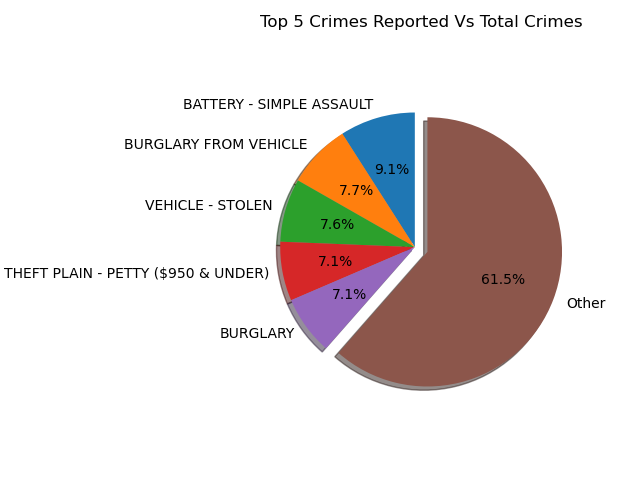

In [80]:
# PLotting the top 5 commited crimes and comparing it to the total number of crimes commited to see
# how big of an impact the crimes are compared to the rest of the crimes
crime_counts = crime_data_df.groupby(['Crime Code Description'])['Crime Code Description'].count().reset_index(name='Count')
crime_counts.sort_values(by='Count', ascending=False, inplace=True)

top_5_crimes = crime_counts.head(5)

other_crimes = crime_counts[5:]
other_crimes_count = other_crimes['Count'].sum()
other_crimes = pd.DataFrame({'Crime Code Description': ['Other'], 'Count': [other_crimes_count]})

top_5_crimes = pd.concat([top_5_crimes, other_crimes])

labels = top_5_crimes['Crime Code Description']
sizes = top_5_crimes['Count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=[0, 0, 0, 0, 0, 0.1])
ax1.axis('equal')
plt.title('Top 5 Crimes Reported Vs Total Crimes')
plt.tight_layout()
plt.show()

# Comparing the Top 3 Highest Rated Crime Neighborhood in Battery - Simple Assault

In [81]:
# Getting the count of Battery - Simple Assault per area.
crimecsv_battery = crime_data_df[crime_data_df['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']
battery_count_per_area = crimecsv_battery.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Sorting the results
battery_count_per_area.sort_values(by='Count', ascending=False, inplace=True)
print(battery_count_per_area)

      Area Name  Count
0   77th Street  14497
1       Central  13714
15    Southwest  13460
14    Southeast  10946
11      Olympic  10397
6     Hollywood   9945
9        Newton   9452
13      Rampart   8992
7       Mission   8525
8   N Hollywood   8053
12      Pacific   7781
5    Hollenbeck   7637
17     Van Nuys   7010
10    Northeast   6960
20     Wilshire   6696
4        Harbor   6582
16      Topanga   6492
18      West LA   6237
2    Devonshire   6083
19  West Valley   5676
3      Foothill   5299


<IPython.core.display.Javascript object>


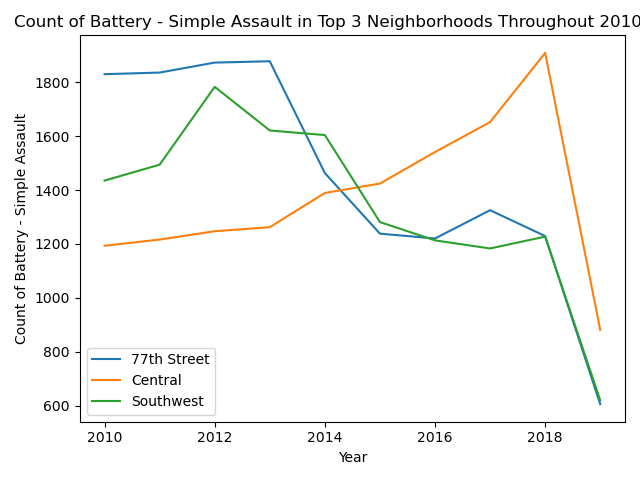

77th Street: Year
2010    1830
2011    1836
2012    1873
2013    1878
2014    1463
2015    1238
2016    1220
2017    1325
2018    1229
2019     605
Name: Year, dtype: int64
Central: Year
2010    1193
2011    1216
2012    1247
2013    1262
2014    1389
2015    1424
2016    1541
2017    1652
2018    1909
2019     881
Name: Year, dtype: int64
Southwest: Year
2010    1435
2011    1494
2012    1783
2013    1621
2014    1604
2015    1281
2016    1213
2017    1183
2018    1227
2019     619
Name: Year, dtype: int64


In [88]:
crime_data_df['Date Occurred'] = pd.to_datetime(crime_data_df['Date Occurred'])

# Filtering the data to include only 77th street, Central and Southwest neighborhoods
crimecsv_selected_areas = crime_data_df[crime_data_df['Area Name'].isin(['77th Street', 'Central', 'Southwest'])]

# Filter the data to include only battery - simple assault
crimecsv_selected_areas = crimecsv_selected_areas[crimecsv_selected_areas['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']

# Group the data by year and area name
crime_count_per_year_per_area = crimecsv_selected_areas.groupby(['Area Name', crimecsv_selected_areas['Date Occurred'].dt.year])['Date Occurred'].count().reset_index(name='Count')

# Plot the line chart
for area in ['77th Street', 'Central', 'Southwest']:
    area_data = crime_count_per_year_per_area[crime_count_per_year_per_area['Area Name'] == area]
    plt.plot(area_data[area_data['Area Name'] == area]['Date Occurred'], area_data[area_data['Area Name'] == area]['Count'], label=area)

plt.xlabel('Year')
plt.ylabel('Count of Battery - Simple Assault')
plt.title('Count of Battery - Simple Assault in Top 3 Neighborhoods Throughout 2010-2018')
plt.legend(loc='best')
plt.tight_layout()


crime_data_df['Date Occurred'] = pd.to_datetime(crime_data_df['Date Occurred'])
crime_data_df['Year'] = crime_data_df['Date Occurred'].dt.year

areas = ['77th Street', 'Central', 'Southwest']
for area in areas:
    crimes_area = crime_data_df[crime_data_df['Area Name'] == area]
    battery_crimes = crimes_area[crimes_area['Crime Code Description'] == 'BATTERY - SIMPLE ASSAULT']
    battery_crimes_per_year = battery_crimes.groupby(['Year'])['Year'].count()
    print(f"{area}: {battery_crimes_per_year}")


plt.show()

# Comparing Burglary from Vehicle and Burglary
We can conclude that the comparison between burglary from vehicle and burglary is that there is always a noticeable gap compared to each neighborhood. This is noticeable throughout the visual except for Mission and Hollenbeck. We can see that there is not too big of a difference in comparison to both crimes while the rest is either one that trumps that other.
This can be due to what I stated earlier regarding committing two of the described crimes in one act rather than separate. The criminal could have stolen goods while committing burglary at a house.


In [55]:
# Creating dataframes for the two crime descriptions to compare
burglary_from_vehicle = crime_data_df[crime_data_df['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
burglary = crime_data_df[crime_data_df['Crime Code Description'] == 'BURGLARY']
# Getting the count for the two descriptions
burglary_from_vehicle_per_area = burglary_from_vehicle.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
burglary_per_area = burglary.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Grouping the count with the area names
burglary_from_vehicle_count_per_area = burglary_from_vehicle[burglary_from_vehicle['Crime Code Description'] == 'BURGLARY FROM VEHICLE'].groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Getting sum to calculate percentage of burglary from vehicle per area.
total_burglaries_from_vehicle = burglary_from_vehicle_count_per_area['Count'].sum()
burglary_from_vehicle_count_per_area['Percentage'] = burglary_from_vehicle_count_per_area['Count'] / total_burglaries_from_vehicle * 100
# Sorting
burglary_from_vehicle_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

print(burglary_from_vehicle_count_per_area)

      Area Name  Count  Percentage
8   N Hollywood  11603    7.561371
6     Hollywood   9211    6.002568
12      Pacific   8925    5.816189
17     Van Nuys   8429    5.492959
18      West LA   8417    5.485139
10    Northeast   8289    5.401724
2    Devonshire   8227    5.361321
11      Olympic   7746    5.047865
15    Southwest   7687    5.009417
20     Wilshire   7591    4.946856
0   77th Street   7199    4.691400
7       Mission   7113    4.635356
1       Central   7065    4.604076
19  West Valley   6873    4.478954
9        Newton   6810    4.437899
16      Topanga   6386    4.161589
13      Rampart   6208    4.045591
4        Harbor   5442    3.546409
14    Southeast   4962    3.233606
3      Foothill   4858    3.165831
5    Hollenbeck   4410    2.873882


In [56]:
# Grouping the crime description with counting the number of times the area name occured.
burglary_count_per_area = crime_data_df[crime_data_df['Crime Code Description'] == 'BURGLARY'].groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
# Getting sum of total count for percentage
total_burglaries = burglary_count_per_area['Count'].sum()
burglary_count_per_area['Percentage'] = burglary_count_per_area['Count'] / total_burglaries * 100
# Sorting
burglary_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

print(burglary_count_per_area)

      Area Name  Count  Percentage
12      Pacific   9700    6.883045
2    Devonshire   9269    6.577211
0   77th Street   9254    6.566567
18      West LA   8953    6.352980
19  West Valley   8570    6.081206
15    Southwest   8117    5.759760
16      Topanga   8106    5.751955
20     Wilshire   7968    5.654031
14    Southeast   7799    5.534110
8   N Hollywood   7519    5.335424
10    Northeast   6844    4.856449
4        Harbor   6835    4.850063
17     Van Nuys   6274    4.451982
7       Mission   6137    4.354768
3      Foothill   5474    3.884308
11      Olympic   5262    3.733875
9        Newton   4713    3.344308
6     Hollywood   4361    3.094532
13      Rampart   3697    2.623363
5    Hollenbeck   3485    2.472929
1       Central   2589    1.837134


<IPython.core.display.Javascript object>


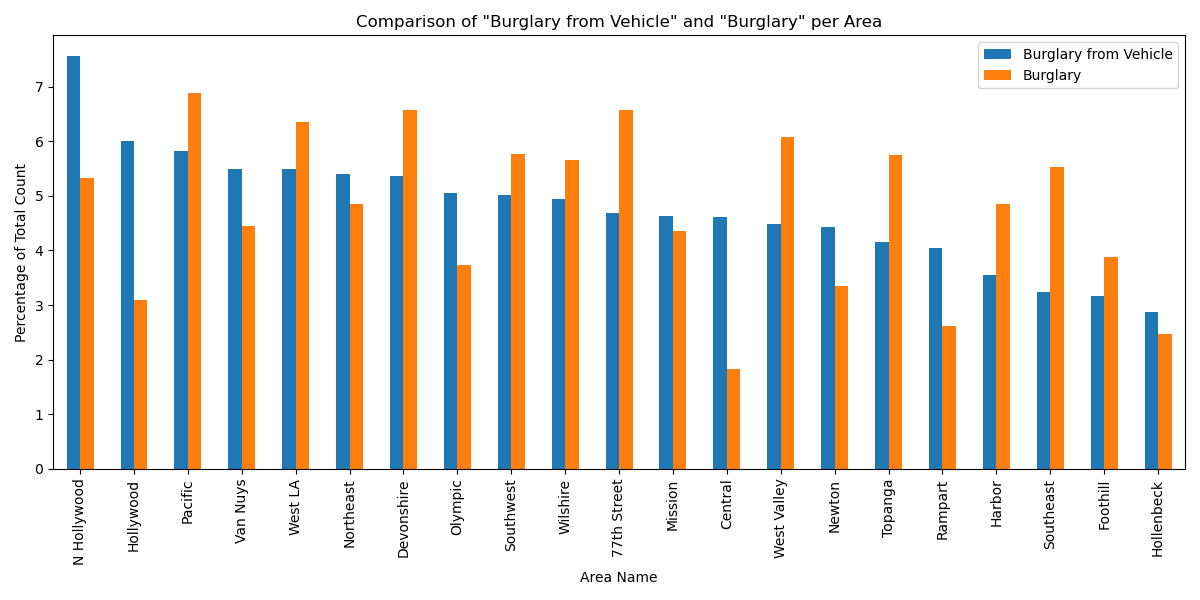

In [57]:
# Get the data for 'BURGLARY FROM VEHICLE'
burglary_from_vehicle = crime_data_df[crime_data_df['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
burglary_from_vehicle_count_per_area = burglary_from_vehicle.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
total_burglaries_from_vehicle = burglary_from_vehicle_count_per_area['Count'].sum()
burglary_from_vehicle_count_per_area['Percentage'] = burglary_from_vehicle_count_per_area['Count'] / total_burglaries_from_vehicle * 100
burglary_from_vehicle_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

# Get the data for 'BURGLARY'
burglary = crime_data_df[crime_data_df['Crime Code Description'] == 'BURGLARY']
burglary_count_per_area = burglary.groupby(['Area Name'])['Area Name'].count().reset_index(name='Count')
total_burglaries = burglary_count_per_area['Count'].sum()
burglary_count_per_area['Percentage'] = burglary_count_per_area['Count'] / total_burglaries * 100
burglary_count_per_area.sort_values(by='Percentage', ascending=False, inplace=True)

# Merge the data for both crimes
compared_crimes = burglary_from_vehicle_count_per_area.merge(burglary_count_per_area, on='Area Name', suffixes=('_burglary_from_vehicle', '_burglary'))

# Plot the data
compared_crimes.plot(x='Area Name', y=['Percentage_burglary_from_vehicle', 'Percentage_burglary'], kind='bar', figsize=(12, 6))
plt.title('Comparison of "Burglary from Vehicle" and "Burglary" per Area')
plt.xlabel('Area Name')
plt.ylabel('Percentage of Total Count')
plt.legend(['Burglary from Vehicle', 'Burglary'])
plt.tight_layout()
plt.show()

# Comparing Burglaries from Vehicle and Burglaries betweeen 10/31-12/31
Burglaries count over the holiday season seems to be pretty stable where the count of times it occurred hovers the ranges 70-98. There is a small peak during the year 2014.Comparing the results to burglaries from vehicles, counts hover in the ranges of 2329-33308. The peak we saw in burglaries in 2014 the least number of burglaries from vehicles was at its lowest. We can assume that during the holiday season, people are out shopping and leaving their presents in the vehicle which explains the tremendous count of burglaries from vehicles during the holiday season.

Implications:
There were fewer counts of burglary throughout 2010-2018 compared to burglary from vehicles during the holiday season because there is an increased opportunity to steal during the holiday season stealing from vehicles due to the increased amount of parked cars in stores which means more likelihood that those cars contain valuables such as gifts, cash and electronics.
With more parked cars in store parking lots, we can imply that public shopping areas are more crowded. This makes it easier for criminals to blend in and go unnoticed. In addition, due to the nature of the holidays, people are often distracted and less vigilant about their surroundings giving thieves more opportunities to commit crime.
Another factor could be that during the holiday season, some people may be more likely to travel which leaves their property unattended for longer periods of time, hence longer open opportunity,


In [58]:
# Converting the 'Date Occurred' column to datetime format
crime_data_df['Date Occurred'] = pd.to_datetime(crime_data_df['Date Occurred'])
# Extracting the day and month information from the 'Date Occurred' column
crime_data_df['Day'] = crime_data_df['Date Occurred'].dt.day
crime_data_df['Month'] = crime_data_df['Date Occurred'].dt.month
# Creating a dataframe containing only the crimes that occurred between October 31st to December 31st
oct_31_to_dec_31_crimes = crime_data_df[(crime_data_df['Month'] >= 10) & (crime_data_df['Month'] <= 12) & ((crime_data_df['Day'] >= 31) | (crime_data_df['Month'] > 10))]
# Creating a dataframe containing only the 'BURGLARY FROM VEHICLE' crimes that occurred between October 31st to December 31st
burglary_from_vehicle_crimes = oct_31_to_dec_31_crimes[oct_31_to_dec_31_crimes['Crime Code Description'] == 'BURGLARY FROM VEHICLE']
# Counting the number of 'BURGLARY FROM VEHICLE' crimes that occurred each year between October 31st to December 31st
burglary_from_vehicle_count_per_year = burglary_from_vehicle_crimes.groupby(burglary_from_vehicle_crimes['Date Occurred'].dt.year)['Date Occurred'].count()


print(burglary_from_vehicle_count_per_year)

Date Occurred
2010    2939
2011    2906
2012    2659
2013    2515
2014    2329
2015    2831
2016    3038
2017    3170
2018    3308
Name: Date Occurred, dtype: int64


In [62]:
# Same concept as above but looking for Burglary instead.
crime_data_df['Date Occurred'] = pd.to_datetime(crime_data_df['Date Occurred'])
crime_data_df['Day'] = crime_data_df['Date Occurred'].dt.day
crime_data_df['Month'] = crime_data_df['Date Occurred'].dt.month
burglary_crimes = crime_data_df[(crime_data_df['Month'] >= 10) & (crime_data_df['Month'] <= 12) & (crime_data_df['Day'] >= 31)]
burglary = burglary_crimes[burglary_crimes['Crime Code Description'] == 'BURGLARY']
burglary_count_per_year = burglary.groupby(burglary['Date Occurred'].dt.year)['Date Occurred'].count()

print(burglary_count_per_year)

Date Occurred
2010     98
2011     85
2012     98
2013     92
2014    120
2015     93
2016     90
2017     95
2018     70
Name: Date Occurred, dtype: int64


<IPython.core.display.Javascript object>


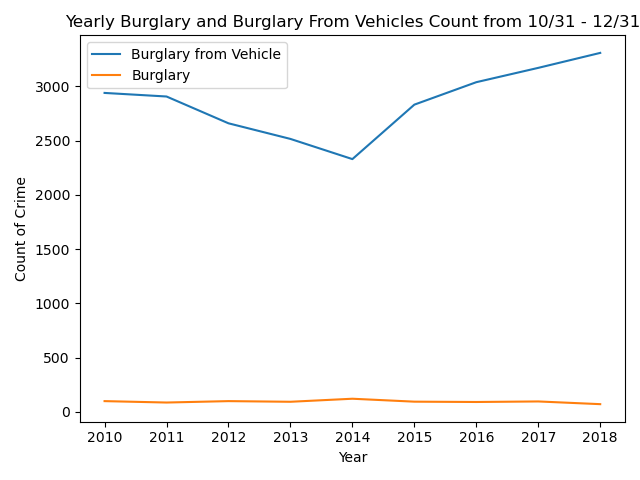

In [63]:
# Plot
plt.plot(burglary_from_vehicle_count_per_year.index, burglary_from_vehicle_count_per_year.values, label='Burglary from Vehicle')
plt.plot(burglary_count_per_year.index, burglary_count_per_year.values, label='Burglary')
plt.xlabel('Year')
plt.ylabel('Count of Crime')
plt.title('Yearly Burglary and Burglary From Vehicles Count from 10/31 - 12/31')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Statistics of Victims' Age
Looking into the statistics of the Victims’ demographics involved in the crimes dataset, the average age of the victim in 77th street was 31.5 years. The highest victim age range count in all of LA County was Ages 30 and under with 953833 counts. The lowest victim age range count in all of LA County was Ages 60 and over with 179464 counts.

Implications:
What we can gather from this data is that young adults face higher risks of crimes and arrest more than any other age group. Some factors behind this cause can be due to peer relationship is of more importance at this period in life. Another factor can be that the unemployment rate is higher within the youth compared to older adults - which can push the offensers to commit more crimes in order to obtain money or other items. 

In [12]:
#Diplay a data table of the mean, median, and SEM of crime offenders' age who committed homicide
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
std=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).std()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).sem()


summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                           "Standard Deviation of Victim Age": std,
                          "Victim Age Standard Error":sem})
summary_stat

,Mean of Victim Age,Median of Victim Age,Standard Deviation of Victim Age,Victim Age Standard Error
Area Name,,,,
77th Street,31.594264,31.0,19.847169,0.053521
Central,34.387937,34.0,18.313658,0.060880
Devonshire,33.869388,34.0,22.390451,0.074083
Foothill,31.350666,31.0,20.994190,0.076483
Harbor,30.279872,31.0,22.075137,0.074854
Hollenbeck,27.200397,27.0,21.410971,0.078968
Hollywood,29.643117,29.0,19.248098,0.063205
Mission,29.961075,30.0,20.479871,0.065289
N Hollywood,31.773088,32.0,20.716234,0.063123


In [13]:
#Display a data table of the mean, median, std, sem of Victim Age by Crime Code
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).median()
std=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).std()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).sem()

summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                           "Standard Deviation of Victim Age": std,
                          "Victim Age Standard Error":sem})
summary_stat.head(20)

,Mean of Victim Age,Median of Victim Age,Standard Deviation of Victim Age,Victim Age Standard Error
Crime Code,,,,
110,33.212604,30.0,14.983000,0.291938
113,14.000000,11.0,14.508618,6.488451
121,26.649797,23.0,12.878236,0.131554
122,30.602294,27.0,14.294662,0.441986
210,30.988739,29.0,18.201789,0.064599
220,32.548191,31.0,17.625041,0.165357
230,33.955004,31.0,15.541146,0.052741
231,9.570039,0.0,16.360910,0.416644
235,8.180485,8.0,6.380406,0.161130


In [14]:
# Create an empty dictionary to store the results
victim_age_ranges = {'Victim Age Range': ['Ages 30 and under', 'Ages 31-59', 'Ages 60 and over'],
                     'Count': [0, 0, 0]}

# Create a dataframe from the dictionary
victim_age_ranges_df = pd.DataFrame(victim_age_ranges)

# Count the number of crimes where the victim's age is 30 and under
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 30 and under', 'Count'] = \
    crime_data_df[crime_data_df['Victim Age'] <= 30]['DR Number'].count()

# Count the number of crimes where the victim's age is between 31 and 59
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 31-59', 'Count'] = \
    crime_data_df[(crime_data_df['Victim Age'] > 30) & (crime_data_df['Victim Age'] <= 59)]['DR Number'].count()

# Count the number of crimes where the victim's age is 60 and over
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 60 and over', 'Count'] = \
    crime_data_df[crime_data_df['Victim Age'] >= 60]['DR Number'].count()

victim_age_ranges_df

,Victim Age Range,Count
0,Ages 30 and under,953833
1,Ages 31-59,859962
2,Ages 60 and over,179464


<IPython.core.display.Javascript object>


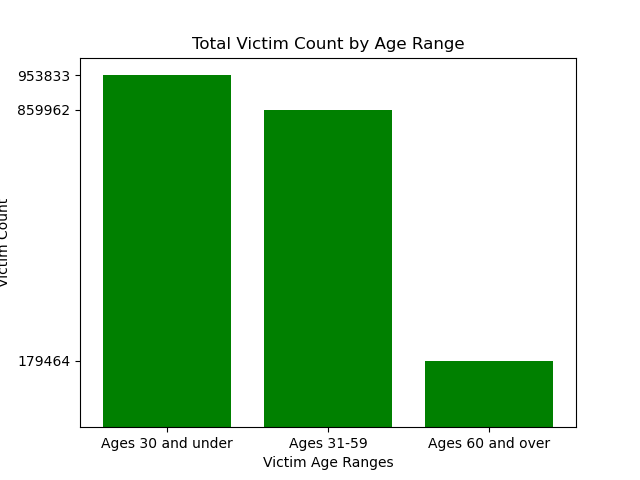

([<matplotlib.axis.YTick at 0x225000c3580>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

In [15]:
ranges=victim_age_ranges_df['Victim Age Range']
count_total= [953833, 859962, 179464]
x_axis= np.arange(len(ranges))
plt.bar(ranges, count_total, color='g', align='center')
plt.title("Total Victim Count by Age Range")
plt.ylabel("Victim Count")
plt.xlabel("Victim Age Ranges")
plt.yticks(count_total)

<IPython.core.display.Javascript object>


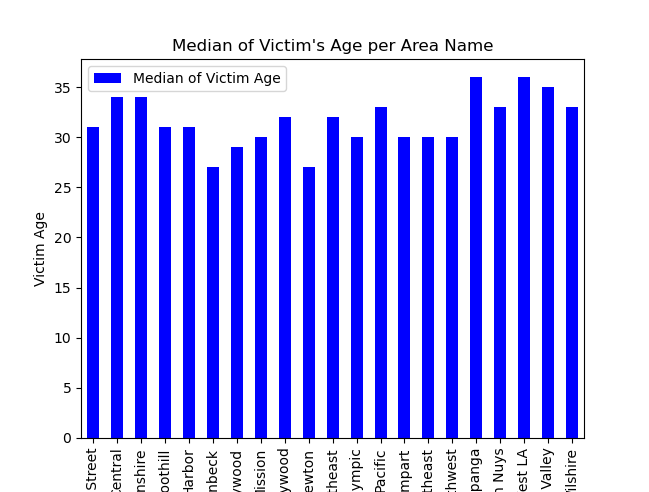

Text(0.5, 1.0, "Median of Victim's Age per Area Name")

In [16]:
#Display bar graph of the Median of Victim Age
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
median_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=median_stat.plot.bar(color='b')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Median of Victim's Age per Area Name")

<IPython.core.display.Javascript object>


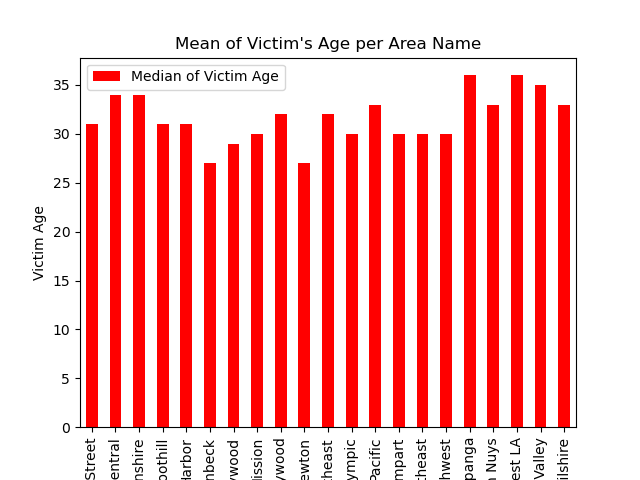

Text(0.5, 1.0, "Mean of Victim's Age per Area Name")

In [30]:
#Display bar graph of the Mean of Victim Age
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
mean_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=mean_stat.plot.bar(color='r')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Mean of Victim's Age per Area Name")

# Gender Distribution
With the provided dataset, the gender distribution of the crimes committed in LA County showed a count of 920405 crimes involving males, whereas the count with females were 840397. This statistic comes out to around 50.9% of the population were male, and 46.5% were female. 

Implications:
Based on Criminologist studies, there is often a belief that associates with masculinity and dominance along with status. Individuals may form their beliefs that enforces dominance and masculinity which results in competition for status amongst peers. Whereas, in society women most often do not display traits of dominance and violence. Overall, a natural trend amongst the crime offenders can be that the men portray more anti-social behavior than that of women do, as well as a drive for power and control. 

In [18]:
#Provide a dataset of the crimes committed by men vs women 
gender_data_df=crime_data_df["Victim Sex"].value_counts()
gender_data_df

M    920405
F    840397
X     46409
H        70
N        17
-         1
Name: Victim Sex, dtype: int64

In [19]:
#Rename Gender Columns, Combine X, H, N
crime_data_df.loc[crime_data_df["Victim Sex"].isin(["X", "H", "N"]),"Victim Sex"]= "Other"

gender_data_df=crime_data_df["Victim Sex"].value_counts()

new_gender_data_df=gender_data_df.rename({"M":"Male", "F":"Female"
                                                 })
#Drop "-" Column 
del new_gender_data_df["-"]
new_gender_data_df

Male      920405
Female    840397
Other      46496
Name: Victim Sex, dtype: int64

<IPython.core.display.Javascript object>


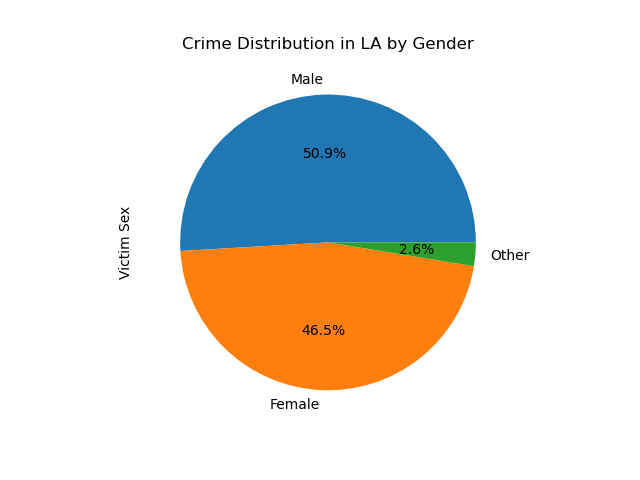

In [33]:
#Generate a pie chart showing the distribution of male vs. female vs. other 
pie_chart=new_gender_data_df
pie_chart.plot.pie(autopct= "%1.1f%%")
plt.title('Crime Distribution in LA by Gender')
plt.show()

In [21]:
#Display a data table of Gender Count by Area Name
area_by_sex=crime_data_df['Victim Sex'].groupby(crime_data_df['Area Name']).value_counts()
area_gender_mean=crime_data_df['Victim Sex'].groupby(crime_data_df['Area Name'])
gender_data=pd.DataFrame({"Gender Count by Area Name": area_by_sex})
gender_data.head(20)

Gender Count by Area Name
Area Name   Victim Sex                           
77th Street F                               68019
            M                               53093
            Other                            1945
Central     M                               51456
            F                               33987
            Other                            1142
Devonshire  M                               42308
            F                               37091
            Other                            4679
Foothill    M                               35197
            F                               30829
            Other                              78
Harbor      M                               37569
            F                               35148
            Other                            3598
Hollenbeck  M                               30611
            F                               29549
            Other                            2471
Hollywood   M                               47937
            F                               33467

# Summary Statistics on Ethnicity
Ethnicities with the highest number of victims were Hispanic at 685,420 victims, White (not hispanic) at 483,035 victims, Black (not hispanic) at 316,944 victims, and Unknown (race not identified) at 191,600 as illustrated in line 40. Hispanic descents have the highest number of victims. This data reveals that the hispanic community were involved the most in reported crimes in LA county. 

A further analysis was conducted to see which crime code was reported most frequently for each ethnicity. A data frame was created and then condensed to see the largest data inputs. The crime code that was most prevalent was crime code 624 (Simple Assault). Hispanic and Black victim descents had the most  crimes codes reported for simple assault. The running candidate could target this crime code and plan his initiatives around reducing physical violence. 77th street's highest crime code count was simple assault. This street could be targeted for non-violence campaigns. The data frame revealed that crime code 624 was most frequently reported for both Hispanic and Black victim descents.

The top three crime codes reported for Black victim descents were crime code 624 (Simple assault), 626 (Domestic Assault), and 230  (Aggravated Assault with a deadly weapon). Hispanic victim descent was almost identical in comparison to the top three crime codes for Black victim descents. The top three crime codes for Hispanic descents were 624, 626, and 330 (Burglary from vehicle). The pie chart displays the percentage these ethnicities have and the similar trends with simple assault being among the highest among all other crime codes in this group. A campaign to reduce assault in these victim communities would help to target the majority of reported crimes that are for simple assault. One limitation is that we do not know the ethnicity of the criminal. Additional data on criminal descent would help reveal which criminal descent  and genders are committing these crimes. Overall there is a large issue with simple assault and battery occurring with black and  hispanic victims.

In [22]:
#What ethnicities have the highest victim counts?
eth_count = crime_data_df["Victim Descent"].value_counts()
eth_count.head(10)

# Create the lists for a new dataframe
eth_info = {"Ethnicity":["Hispanic", "White", "Black", "Unknown", "Not reported"],
    "Victims Per Ethnicity": [685420, 483035, 316944, 191600, 68234]}
eth_df= pd.DataFrame(eth_info)


eth_df.head(6)

,Ethnicity,Victims Per Ethnicity
0,Hispanic,685420
1,White,483035
2,Black,316944
3,Unknown,191600
4,Not reported,68234


<IPython.core.display.Javascript object>


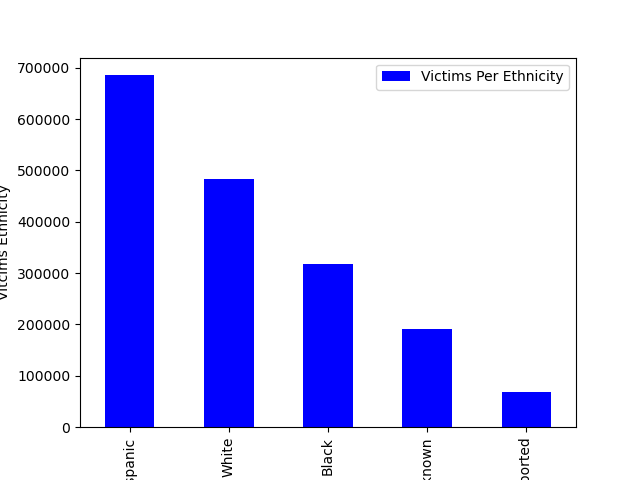

In [35]:
# Bar Chart visiual of victims per ethnicity
var = eth_df.plot (kind = "bar", x= "Ethnicity", y = "Victims Per Ethnicity", color=("b"))
plt.xlabel("Ethnicity Info")
plt.xticks(rotation = 90)
plt.ylabel("Vitcims Ethnicity")
var.set_xticklabels(eth_df["Ethnicity"])

plt.show()

In [24]:
#Create a DataFrame that contains the most frequent crime code for each ethnicity in Victim Descent

#Combine the Victim Descent and Crime Code columns
ethnicity_group = crime_data_df.groupby(["Victim Descent", "Crime Code"]).size().reset_index(name= "Victim_counts")

#Find the Max for each Victim Descent
max_counts = ethnicity_group.groupby("Victim Descent")["Victim_counts"].agg("max")

#Merge the combined data with the max count for Victim descent
crime_result = pd.merge(ethnicity_group, max_counts, on="Victim Descent", suffixes = ("", "_max"))

crime_result = crime_result[crime_result["Victim_counts"] == crime_result["Victim_counts_max"]]

crime_result = crime_result.drop(columns=["Victim_counts_max"])

# Filter the data frame so that we only see Victim counts over 10000
cleaned_crime_result = crime_result.query("Victim_counts >= 10000")

#Display the dta frame
cleaned_crime_result

,Victim Descent,Crime Code,Victim_counts
177,B,624,45217
487,H,624,81094
783,O,310,20913
1041,W,330,52427
1196,X,442,12271


In [25]:
cleaned_crime_result.sort_values(by="Victim_counts")

,Victim Descent,Crime Code,Victim_counts
1196,X,442,12271
783,O,310,20913
177,B,624,45217
1041,W,330,52427
487,H,624,81094


In [26]:
# Filter the data to see what the most frequent crime codes for Victim Descent B

victim_descent= ["B"]
victim_data = crime_data_df[crime_data_df["Victim Descent"].isin(victim_descent)]

#Group the data by the Crime code and victim count
crime_commit = victim_data.groupby(["Victim Descent","Crime Code"]).size().reset_index(name="Victim_count")
crime_victims = crime_commit.sort_values("Victim_count", ascending=False)


print(crime_victims.head(10))

   Victim Descent  Crime Code  Victim_count
58              B         624         45217
60              B         626         27766
6               B         230         26740
37              B         440         22538
15              B         330         19033
13              B         310         18627
26              B         354         18279
77              B         745         16766
76              B         740         14638
4               B         210         13857


<IPython.core.display.Javascript object>


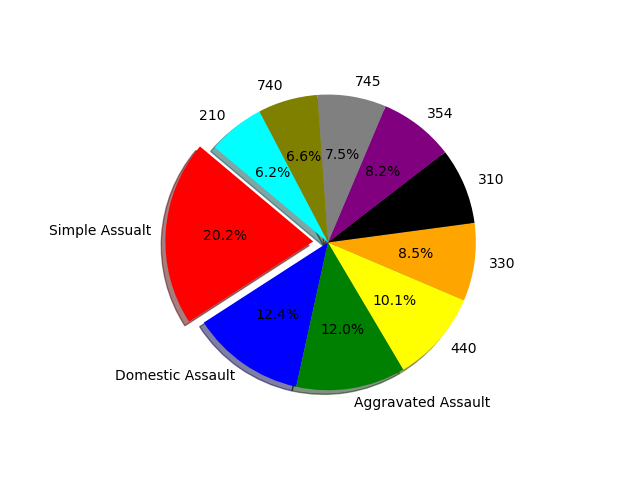

In [36]:
# Labels for the sections of the Pie chart
labels = ["Simple Assualt", "Domestic Assault", "Aggravated Assault", "440", "330", "310", "354", "745", "740", "210"]

# The values for the number of assualts
number_of_assaults = [45217, 27766, 26740, 22538, 19033, 18627, 18279, 16766, 14638, 13857]

# Set colors for each section of the pie chart
colors = ["red", "blue", "green", "yellow", "orange", "black", "purple", "grey", "olive", "cyan"]

#Seperate the "Simple Assualt" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart and display it
plt.pie(number_of_assaults, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [28]:
# Filter the data to see what the most frequent crime codes for Victim Descent H
victim_descent= ["H"]
victim_data = crime_data_df[crime_data_df["Victim Descent"].isin(victim_descent)]

#Group the data by the Crime code and victim count
crime_commit = victim_data.groupby(["Victim Descent","Crime Code"]).size().reset_index(name="Victim_count")
crime_victims = crime_commit.sort_values("Victim_count", ascending=False)

print(crime_victims.head(10))

   Victim Descent  Crime Code  Victim_count
60              H         624         81094
62              H         626         55708
15              H         330         54337
6               H         230         42289
37              H         440         41949
4               H         210         40938
26              H         354         38663
78              H         740         37278
13              H         310         35662
79              H         745         32623


<IPython.core.display.Javascript object>


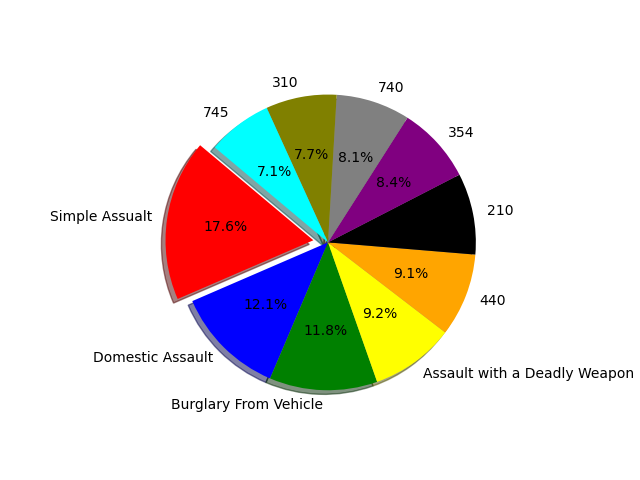

In [37]:
# Labels for the sections of the Pie chart
labels = ["Simple Assualt", "Domestic Assault", "Burglary From Vehicle","Assault with a Deadly Weapon", "440", "210", "354", "740", "310", "745"]

# The values for the number of assualts
number_of_assaults = [81094, 55708, 54337, 42289, 41949, 40938, 38663, 37278, 35662, 32623]

# Set colors for each section of the pie chart
colors = ["red", "blue", "green", "yellow", "orange", "black", "purple", "grey", "olive", "cyan"]

#Seperate the "Simple Assualt" section from the others
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart and display it
plt.pie(number_of_assaults, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()